### Create a stereographic projection from a cif file

1. [Read a cif file](#1)
2. [Plot the crystal directions](#2)
3. [Visualize the stereographic projection](#3)

*Dependencies*:
- pip install crystals
- conda install -c anaconda h5py
- pip install orix

*References*:
- Grosse-Kunstleve, R. W., Sauter, N. K., & Adams, P. D. (2021). ORIX: a Python library for crystallographic data analysis. Journal of Applied Crystallography, 54(2), 351-357. https://doi.org/10.1107/S1600576721001314
- Gražulis, S., Chateigner, D., Downs, R.T., Yokochi, A.F.T., Quirós, M., Lutterotti, L., Manakova, E., Butkus, J., Moeck, P., and Le Bail, A. (2009). Crystallography Open Database – an open-access collection of crystal structures. Journal of Applied Crystallography, 42, 726-729. https://doi.org/10.1107/S0021889809016690
- de Cotret, L. P. R., Otto, M. R., Stern, M. J., & Siwick, B. J. (2018). An open-source software ecosystem for the interactive exploration of ultrafast electron scattering data. Advanced Structural and Chemical Imaging, 4(1), 11. https://doi.org/10.1186/s40679-018-0069-6
- Bjorkman, T. (2011). CIF2Cell: Generating geometries for electronic structure programs. Computer Physics Communications, 182(6), 1183-1186. https://doi.org/10.1016/j.cpc.2011.02.015

***

#### 1. Read a cif file<a id="1"></a>
- https://crystals.readthedocs.io/en/master/api/data-structures.html
- http://www.crystallography.net/cod/

In [1]:
from crystals import Crystal

si=Crystal.from_cif("Si_Fd-3m-1_1526655.cif")
si #check

< Crystal object with following unit cell:
    Atom Si @ (0.00, 0.00, 0.00)
    Atom Si @ (0.00, 0.50, 0.50)
    Atom Si @ (0.25, 0.25, 0.25)
    Atom Si @ (0.25, 0.75, 0.75)
    Atom Si @ (0.50, 0.00, 0.50)
    Atom Si @ (0.50, 0.50, 0.00)
    Atom Si @ (0.75, 0.25, 0.75)
    Atom Si @ (0.75, 0.75, 0.25)
Lattice parameters:
    a=5.381Å, b=5.381Å, c=5.381Å
    α=90.000°, β=90.000°, γ=90.000°
Chemical composition:
    Si: 100.000% >

#### 2. Plot the crystal directions<a id="2"></a>
- https://orix.readthedocs.io/en/stable/tutorials/crystal_directions.html

In [2]:
#> prepare the plot
%matplotlib inline

from diffpy.structure import Lattice, Structure
import matplotlib.pyplot as plt
import numpy as np
from orix.crystal_map import Phase
from orix.quaternion import Orientation, Rotation, symmetry
from orix.vector import Miller, Vector3d


plt.rcParams.update(
    {
        "figure.figsize": (7, 7),
        "font.size": 20,
        "axes.grid": True,
        "lines.markersize": 10,
        "lines.linewidth": 2,
    }
)

#make an orix phase from the cif file
si_phase = Phase(point_group=si.pointgroup,
                   structure=Structure(lattice=Lattice(*si.lattice_parameters)))
#check
print(si_phase)
print(si_phase.structure.lattice)

<name: . space group: None. point group: m-3m. proper point group: 432. color: tab:blue>
Lattice(a=5.381, b=5.381, c=5.381, alpha=90, beta=90, gamma=90)


#### 3. Visualize the stereographic projection<a id="3"></a>

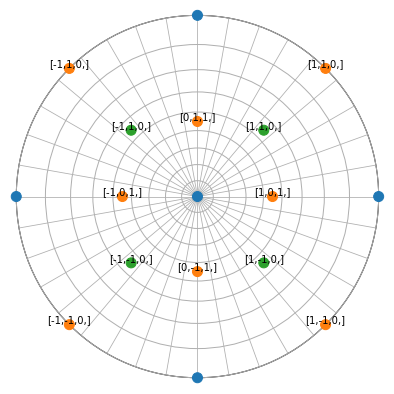

In [5]:
m = Miller(hkl=[[1, 0, 0], [1, 1, 0], [1, 1, 1]], phase=si_phase)
m.multiplicity

#make miller indices labels
#get miller indices
vector_labels = [str(j.hkl[0]).replace(" ","").replace(".",",") for i in range(1, m.size) for j in m[i].symmetrise(unique=True)]
unique_m = [m[i].symmetrise(unique=True) for i in range(m.size)]
fig = unique_m[0].scatter(c="C0", return_figure=True)

for i, m_sym in enumerate(unique_m[1:], start=1):
    m_sym.scatter(c=f"C{i}", figure=fig, vector_labels=vector_labels, text_kwargs=dict(size=10))

***